In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/22608.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/23274.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/23775.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/22046.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/23436.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/20684.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/20554.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/21093.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/24287.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/20762.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/24036.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/21808.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/21118.jpg
/kaggle/input/intel-image-dataset/Intel Image Datas

# Discover
* In this project, we will be working on intel images i.e., images of buildings, forest, streets, etc. 
* We will build a cnn model and train it on these images.
* This is a multiclass classification problem and we will use keras

## steps to solve the problem
1. adding the dataset
2. Visualizing the images that we will be working on 
3. Analyzing the dimensions to verify if all images have same dimensions
4. Converting the images into a numpy array and normalize them.
5. Checking class imabalance
6. Splitting the data and performing one-hot encoding
7. creating the model architecture, compiling the model and then fitting it.
8. Plotting the accuracy and loss against each epoch.
9. Preprocessing the test data and make predictions on it.
10. Visualizing the orizinal and predicted labels for the test images

#### Use cases
* This project can be used for educational purposes to get a better understanding of how to create network architecture for a CNN model. We can further hyperparameter tune this model to reach higher accuracy.

* This project has a vast scope, it can be used to classify SATELLITE IMAGES, DRONE IMAGES, GOOGLE IMAGES into different classes like sea, mountain, etc.

# 1.

In [2]:
!ls -a

.  ..  __notebook__.ipynb


We will start by importing some required libraries

In [3]:
# Important imports
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

import tensorflow as tf
import random
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation,\
    Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

# 2.

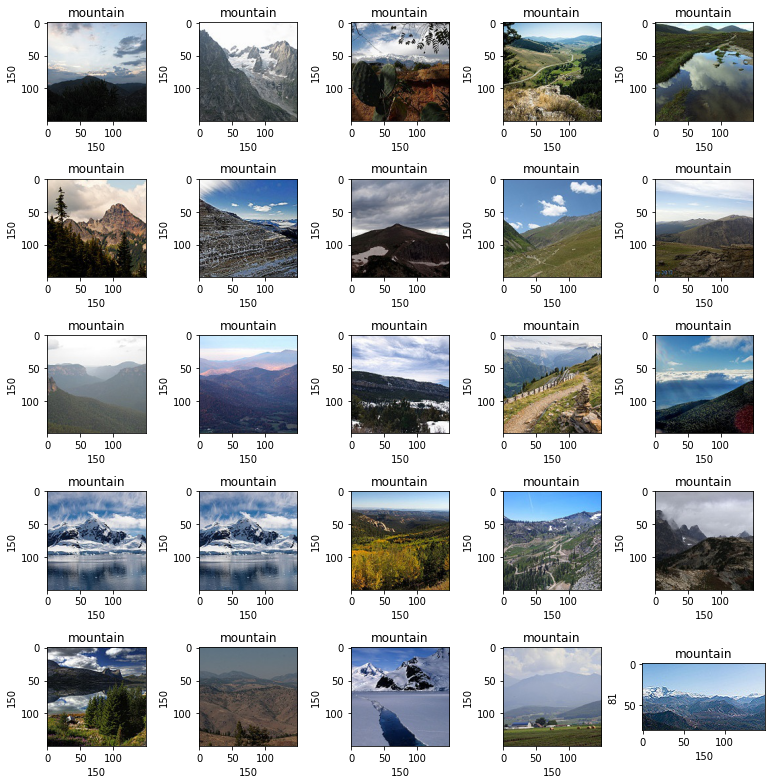

In [4]:
# Plotting 25 images to check dataset
plt.figure(figsize=(11,11))
path = "/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('mountain')
    plt.xlabel(rand_img.shape[1], fontsize=10)
    plt.ylabel(rand_img.shape[0], fontsize=10)

- Setting the root directory for the dataset and storing all the folders name of the dataset.
- We will also create 2 empy list for images and labels.

In [5]:
dir = "/kaggle/input/intel-image-dataset/Intel Image Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

# 4.

- now, we will resize images as some of the images don't have same dimensions.
- So, we will read and resize all the images.
- Then, we will convert it into array and appending the list created above with the image and its label.

In [6]:
# Reading and converting image to numpy array
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        image_path = f"{dir}/{directory}/{files}"
        image = Image.open(image_path)
        image = image.resize((150,150)) #All images does not have same dimension
        image = img_to_array(image)
        image_list.append(image)
        label_list.append(directory)

# 5.
Checking for images per class.

In [7]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

glacier      553
mountain     525
sea          510
street       501
forest       474
buildings    437
dtype: int64

- Storing the number of classes which will be used further in model architecture.

In [8]:
# Checking count of classes
num_classes = len(label_counts)
num_classes

6

- Check the shape of the x data for input layer of model architecture.

In [9]:
# Checking x data shape
np.array(image_list).shape

(3000, 150, 150, 3)

- Checking the no. of labels in y data which should be equal to total number of images.

In [10]:
# Checking y data shape
label_list = np.array(label_list)
label_list.shape

(3000,)

# 6.

- Now, we will split our dataset into testing and training using train_test_split() from sklearn.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

- Now, we will normalize the images by dividing them with 255 and we will also reshape X_train and X_test data.

In [12]:
X_train = np.array(X_train, dtype=np.float16) / 225.0
X_test = np.array(X_test, dtype=np.float16) / 225.0
X_train = X_train.reshape(-1, 150, 150, 3)
X_test = X_test.reshape(-1, 150, 150, 3)

- Now, we will use label binarizer to one hot encode our y data.
- We will also print the sequence of the classes

In [13]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


- Now, we will split the training data to validation and training data.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# 7.
- Now, will create a network architecture for the model.
- We have used different types of layers according to their features namely BatchNormalization (Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch), LeakyReLU(The Leaky ReLU modifies the function to allow small negative values when the input is less than zero), Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2D(It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).
- In the last layer we used softmax as the activation function because it is a multi class classification problem

In [15]:
model = Sequential([
    Conv2D(16, kernel_size = (3,3), input_shape=(150,150,3)),
    BatchNormalization(),
    LeakyReLU(),
    
    Conv2D(32, kernel_size=(3,3)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(5,5),
    
    Conv2D(64, kernel_size=(3,3)),
    BatchNormalization(),
    LeakyReLU(),
    
    Conv2D(128, kernel_size=(3,3)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(5,5),
    
    Flatten(),
    
    Dense(64),
    Dropout(rate=0.2),
    BatchNormalization(),
    LeakyReLU(),
    
    Dense(32),
    Dropout(rate=0.2),
    BatchNormalization(),
    LeakyReLU(),
    
    Dense(16),
    Dropout(rate = 0.2),
    BatchNormalization(),
    LeakyReLU(1),
    
    Dense(6, activation = 'softmax')
    
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 16)      64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0

- For compiling the model we need to pass 3 parameters namely loss, optimizer and metrics. Here, we will use loss as categorical_crossentropy, optimizer as Adam and metrics as accuracy.

In [17]:
model.compile(loss='categorical_crossentropy', \
              optimizer=Adam(0.0005), \
              metrics=['accuracy'])

- Now we will fit the model with the data and finding out the accuracy at each epoch to see how our model is learning.
- Now, we will train our model on 70 epochs and a batch size of 128.

In [18]:
# Training the model
epochs = 70
batch_size = 128
history = model.fit(X_train, y_train,\
          batch_size=batch_size,\
          epochs=epochs,
          validation_data=(X_val, y_val))

Epoch 1/70
15/15 [==============================] - 10s 130ms/step - loss: 1.5131 - accuracy: 0.3969 - val_loss: 1.7760 - val_accuracy: 0.2708
Epoch 2/70
15/15 [==============================] - 1s 82ms/step - loss: 1.1857 - accuracy: 0.5516 - val_loss: 1.9335 - val_accuracy: 0.1875
Epoch 3/70
15/15 [==============================] - 1s 82ms/step - loss: 1.0347 - accuracy: 0.6089 - val_loss: 2.0204 - val_accuracy: 0.1854
Epoch 4/70
15/15 [==============================] - 1s 83ms/step - loss: 0.9202 - accuracy: 0.6646 - val_loss: 2.1493 - val_accuracy: 0.1854
Epoch 5/70
15/15 [==============================] - 1s 83ms/step - loss: 0.8407 - accuracy: 0.7193 - val_loss: 2.3978 - val_accuracy: 0.1854
Epoch 6/70
15/15 [==============================] - 1s 83ms/step - loss: 0.7609 - accuracy: 0.7641 - val_loss: 2.5580 - val_accuracy: 0.1854
Epoch 7/70
15/15 [==============================] - 1s 82ms/step - loss: 0.7062 - accuracy: 0.7823 - val_loss: 2.6923 - val_accuracy: 0.1854
Epoch 8/70


- We will save the model using model.save() to use it later for prediction

In [19]:
model.save("IntelImageClassification.h5")

- Now we will plot the accuracy of the model for the training history

# 8.

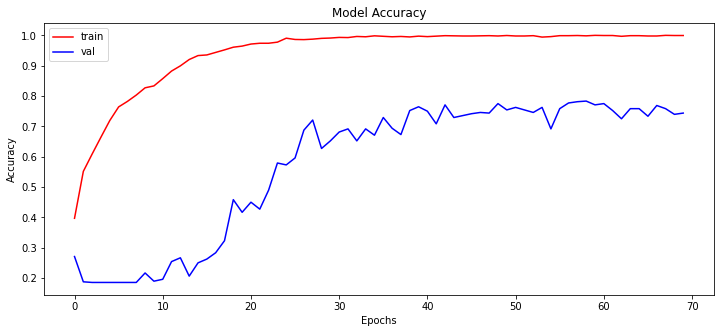

In [20]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

- Now, we will plot the loss of the model for the training history

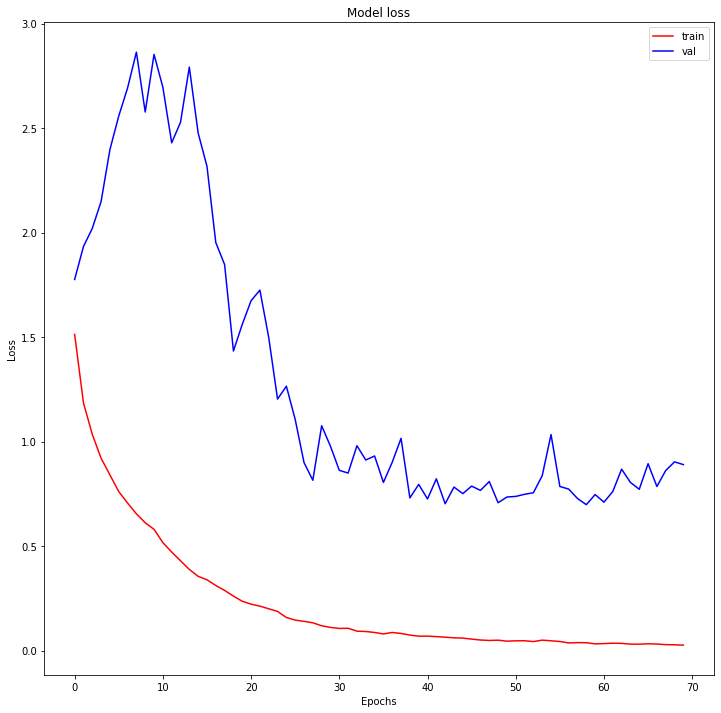

In [21]:
# Plot the loss history
plt.figure(figsize=(12,12))
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

- evaluating the model to know the accuracy of the model on the test data.

In [22]:
scores = model.evaluate(X_test,y_test)
print(f"Test Accuracy: {scores[1]*100}")

19/19 [==============================] - 0s 11ms/step - loss: 1.0761 - accuracy: 0.7033
Test Accuracy: 70.333331823349


# 9.

- Generating predictions for test data and storing them into y_pred.

In [23]:
y_pred = model.predict(X_test)

- Visualizing an image to be predicted in further steps.

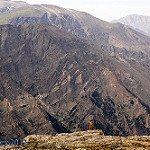

In [24]:
# Plotting image to compare
img = array_to_img(X_test[1])
img

- Now, we will create list of labels using object of label binarizer.
- We will print that list and finally we will print out the prediction and the original label of the image we visualized above using argmax().

# 10.

In [25]:
# Finding max value from prediction list and comparing org. value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ", labels[np.argmax(y_test[1])])
print("Predicted : ", labels[np.argmax(y_pred[1])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Originally :  mountain
Predicted :  mountain


### Conclusion:
- In this project we saw how we can create a cnn using different layers. 
- Normalizing is an important step when working with any type of dataset. 
- We will use this model to predict the class of the image supplied to the model.